# Regression
### 09-09-2022

1) split dataset into feature matrix and target vector
2) split data into train and test (xTrain, xTest, yTrain, yTest)
3) select ML based model
4) fit (training) model (xTrain, yTrain)
5) predict
6) evaluate the model performance (xTest, yTest)

In [203]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [204]:
data = pd.read_csv('./datasets/House_Price.csv')
data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,4,3,5180,19850,2,455000.0
1,3,2,1510,36224,2,415000.0
2,3,3,2040,3810,2,208633.0
3,4,1,1200,11111,2,282000.0
4,3,2,1610,9964,1,514000.0
...,...,...,...,...,...,...
89,3,2,2000,217800,2,540000.0
90,2,2,1270,32175,1,275000.0
91,5,2,2980,7095,2,932800.0
92,3,2,1250,7157,1,400000.0


In [205]:
data.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
count,94.000000,94.000000,94.000000,94.000000,94.000000,9.400000e+01
mean,3.468085,2.191489,2120.659574,19114.680851,1.553191,5.780266e+05
std,0.851338,0.722549,958.299362,35392.708815,0.560664,3.734640e+05
min,2.000000,1.000000,900.000000,941.000000,1.000000,1.379000e+05
25%,3.000000,2.000000,1422.500000,6165.250000,1.000000,3.550000e+05
50%,3.000000,2.000000,1865.000000,8392.500000,2.000000,5.089750e+05
75%,4.000000,2.000000,2515.000000,11971.250000,2.000000,6.697500e+05
max,6.000000,4.000000,5180.000000,217800.000000,3.000000,2.540000e+06


In [206]:
data.isnull().any()
data.isnull().sum()

bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
price          0
dtype: int64

In [207]:
data.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
bedrooms,1.000000,-0.112320,0.543949,-0.062430,0.240133,0.314792
bathrooms,-0.112320,1.000000,-0.004998,-0.143801,0.133843,0.008034
sqft_living,0.543949,-0.004998,1.000000,0.259901,0.366593,0.689990
sqft_lot,-0.062430,-0.143801,0.259901,1.000000,-0.054890,0.212076
floors,0.240133,0.133843,0.366593,-0.054890,1.000000,0.366697
price,0.314792,0.008034,0.689990,0.212076,0.366697,1.000000


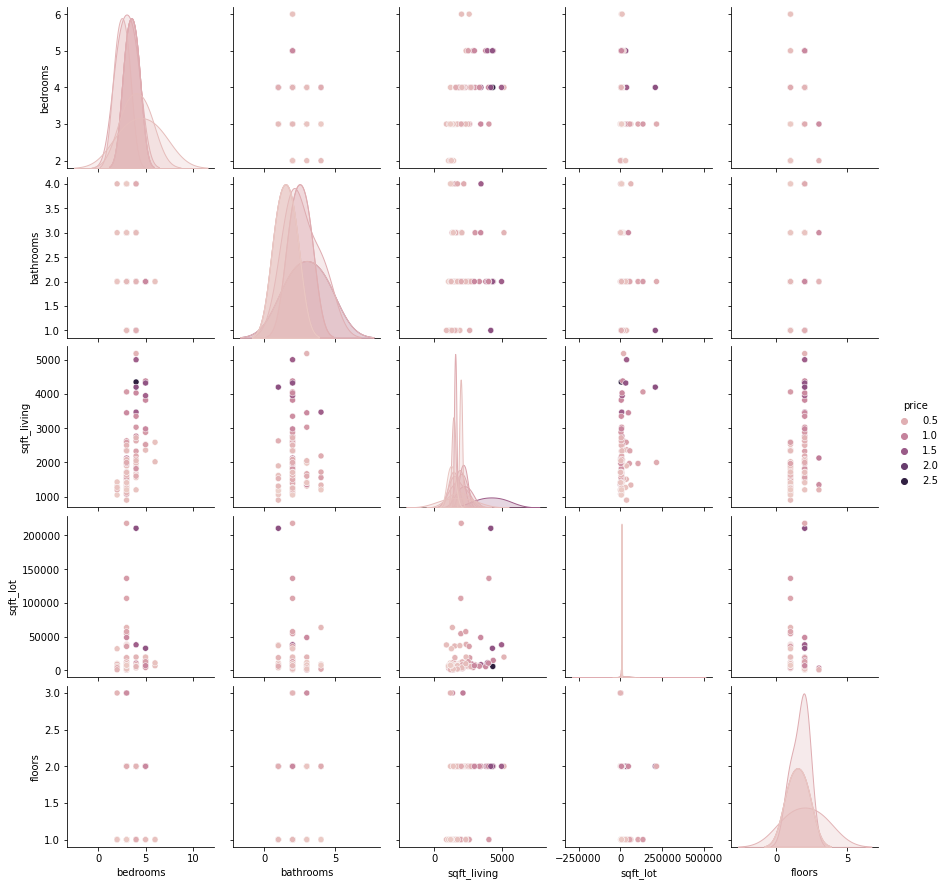

In [208]:
sns.pairplot(data, hue='price')

## Simple Linear Regression

1 dependent 1 independent  
y = mx + c

In [209]:
# Split dataset into feature matrix and target vector
X = np.array(data['sqft_living']).reshape(-1, 1)
Y = data['price']
# Split Data into train and test
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y)

In [210]:
# Model Selection
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)

In [211]:
from sklearn.metrics import r2_score, mean_squared_error
print('R2 Score:', r2_score(yTest, yPred))
print('Mean Squared Error:', mean_squared_error(yTest, yPred))

R2 Score: 0.476508655332041
Mean Squared Error: 44060749223.96844


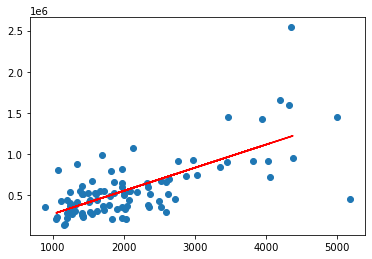

In [212]:
plt.scatter(X, Y)
plt.plot(xTest, yPred, color='red')

## Multiple Linear Regression

1 dependent multiple independent  
y = mx1 + mx2 + ... + c

In [213]:
X = data.drop('price', axis=1)
Y = data['price']
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y)

In [214]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)

In [215]:
from sklearn.metrics import r2_score, mean_squared_error
print('R2 Score:', r2_score(yTest, yPred))
print('Mean Squared Error:', mean_squared_error(yTest, yPred))

R2 Score: -2.7622669781301514
Mean Squared Error: 109956275122.5562


## Polynomial Linear Regression

multiple features based on degree

In [216]:
X = data.drop('price', axis=1)
Y = data['price']

In [217]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
xNew = poly.fit_transform(X)

In [218]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(xNew, Y)

In [219]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)

In [220]:
from sklearn.metrics import r2_score, mean_squared_error
print('R2 Score:', r2_score(yTest, yPred))
print('Mean Squared Error:', mean_squared_error(yTest, yPred))

R2 Score: -0.3275367301599845
Mean Squared Error: 131978959917.24762


## Non Linear Regression

non linear relationship between ip and op

In [221]:
X = data.drop('price', axis=1)
Y = data['price']
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y)

In [222]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)

In [223]:
from sklearn.metrics import r2_score, mean_squared_error
print('R2 Score:', r2_score(yTest, yPred))
print('Mean Squared Error:', mean_squared_error(yTest, yPred))

R2 Score: 0.33181879598136654
Mean Squared Error: 92014303803.92088
